In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
dataset = pd.read_csv("Position_Salaries.csv")
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [32]:
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [33]:
X # 2-D array

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [34]:
y # 1-D array

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [35]:
# Convert y to 2D array because StandardScaler class expects 2D array as input
y = y.reshape(len(y), 1)

In [36]:
y

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]])

Not splitting into train and test, since dataset is small and I want to maximise its utility.

In [37]:
# Feature scaling - important for SVR - scale both target and independent variables.
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [38]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [39]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

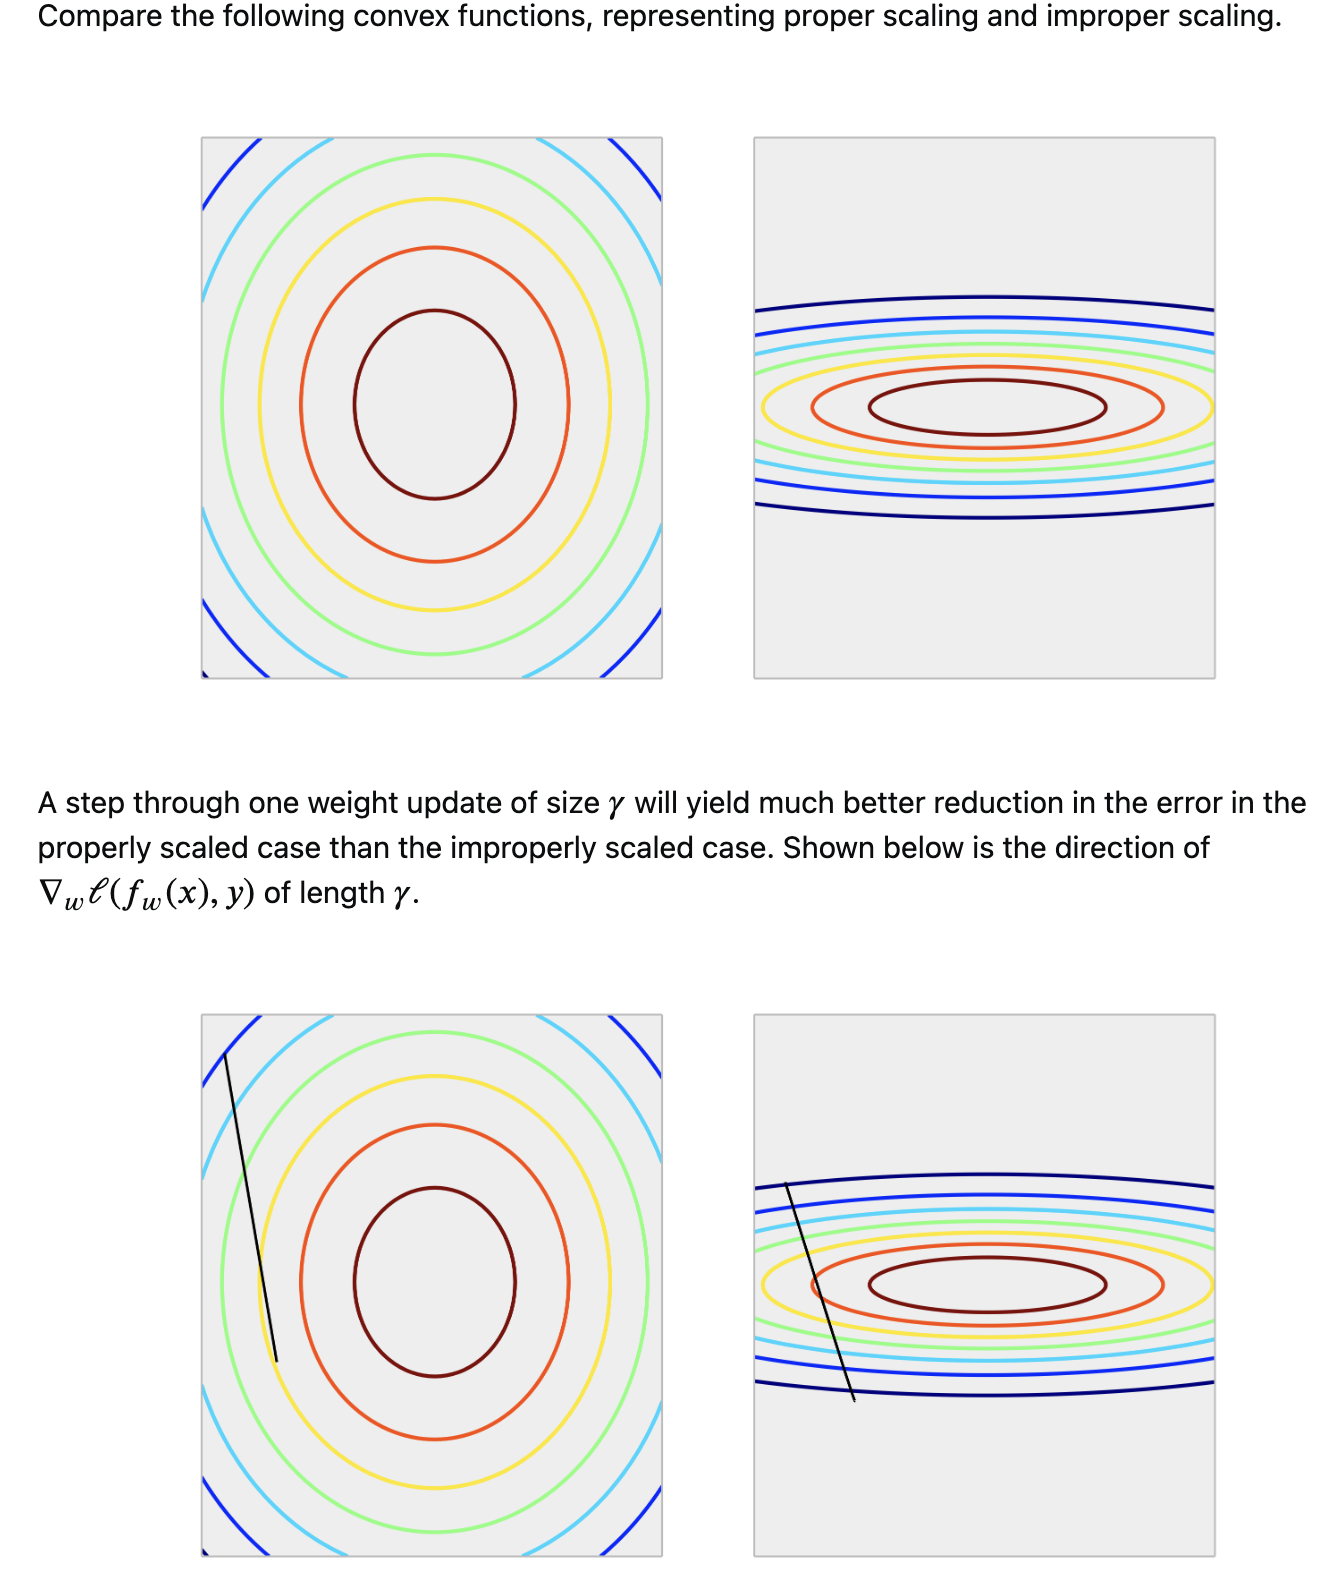

In [40]:
# Model building
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf') # Kernels can learn linear relationships or non-linear relationships

svr.fit(X, y)

/Users/laasya/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [41]:
# Predict for 6.5
svr.predict(sc_X.transform([[6.5]])) # We need to transform first for our SVR model

array([-0.27861589])

In [42]:
sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])).reshape(-1,1)) # Inverse transform to get our proper y value.

array([[170370.0204065]])

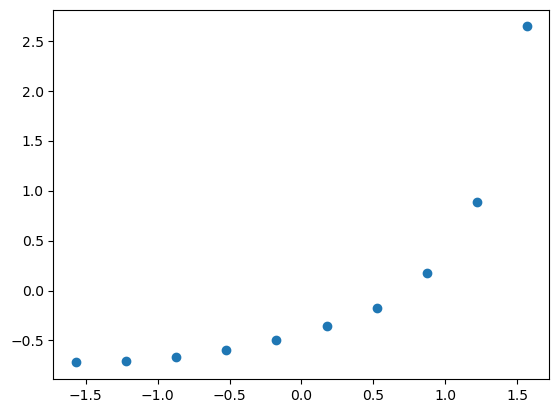

In [44]:
plt.scatter(X, y)

Text(0, 0.5, 'Salary')

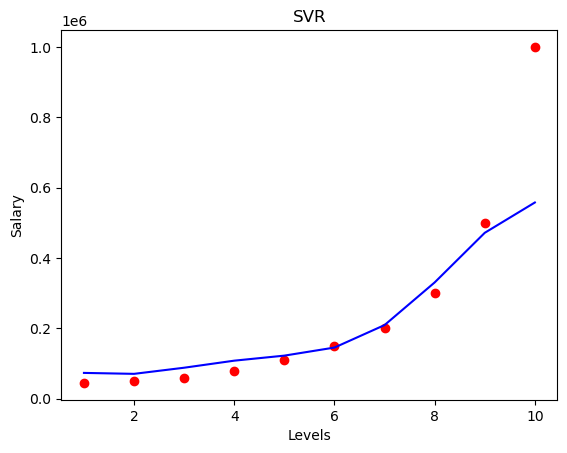

In [45]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(svr.predict(X).reshape(-1,1)), color = 'blue') # We must not apply transform here for X in predict because it is calculated on already transformed X
plt.title("SVR")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()

/var/folders/9c/tw5l79697m9_ccbr5fmrv42m0000gn/T/ipykernel_12053/2392252086.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)


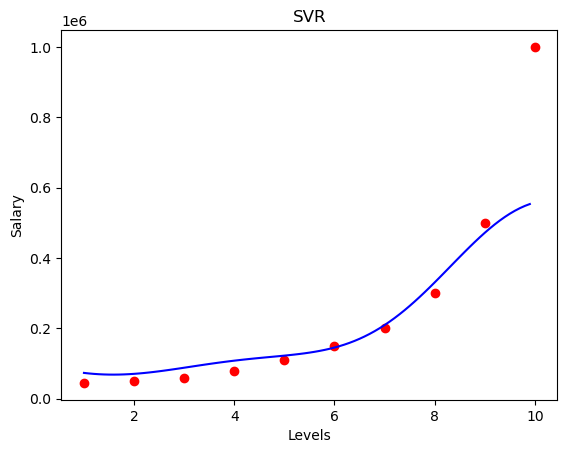

In [46]:
# High resolution and smooth curve

X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(svr.predict(sc_X.transform(X_grid)).reshape(-1,1)), color = 'blue') # Here we are doing transformation in predict because X_grid was inverse transformed in first line.
plt.title("SVR")
plt.xlabel("Levels")
plt.ylabel("Salary")
plt.show()